In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load files

In [2]:
data_temp = []
with open("training/part-00000") as f:
    for line in f:
        data_temp.append(json.loads(line))
        
df_temp = pd.DataFrame(data_temp)
data_temp = []
#df_temp.to_csv("df_1.csv" , encoding="utf-8" , index = False)
#df_temp = []

with open("training/part-00001") as f:
    for line in f:
        data_temp.append(json.loads(line))
        
df_temp =df_temp.append(pd.DataFrame(data_temp), ignore_index = True)
data_temp = []

df = df_temp.drop(["resolution","browser_version","cookie_pta","os_version","device_marketing","url"],axis = 1)
df.head()

,author_id,browser,category_id,city,country,date,device_brand,hour,os,timestamp
0,anise,Chrome Mobile,國內旅遊,Taipei,TW,20150730,Sony,15,Android,1438243085
1,myvitus,Chrome Mobile,戀愛情事,Taipei,TW,20150309,Samsung,7,Android,1425857825
2,bonddealerbook,Chrome,國外旅遊,Taipei,TW,20150719,,15,Windows 7,1437292576
3,loislinlin,Mobile Safari,數位生活,Taipei,TW,20150513,Apple,19,iOS,1431518129
4,saliha,Chrome Mobile,國內旅遊,Taipei,TW,20150422,Sony,0,Android,1429632475


In [3]:
import datetime
import calendar

# Data processing

In [4]:
def ToWD(x):
    y = datetime.datetime.fromtimestamp(x).weekday()
    return y

def ToM(x):
    y = datetime.datetime.fromtimestamp(x).month
    return y

def ToY(x):
    y = datetime.datetime.fromtimestamp(x).year
    return y

def ToD(x):
    y = datetime.datetime.fromtimestamp(x).day
    return y    

df["week_day"]=df["timestamp"].apply(ToWD)
df["month"]=df["timestamp"].apply(ToM)
df["year"]=df["timestamp"].apply(ToY)
df["day"]=df["timestamp"].apply(ToD)

In [5]:
df.head()

,author_id,browser,category_id,city,country,date,device_brand,hour,os,timestamp,week_day,month,year,day
0,anise,Chrome Mobile,國內旅遊,Taipei,TW,20150730,Sony,15,Android,1438243085,3,7,2015,30
1,myvitus,Chrome Mobile,戀愛情事,Taipei,TW,20150309,Samsung,7,Android,1425857825,0,3,2015,9
2,bonddealerbook,Chrome,國外旅遊,Taipei,TW,20150719,,15,Windows 7,1437292576,6,7,2015,19
3,loislinlin,Mobile Safari,數位生活,Taipei,TW,20150513,Apple,19,iOS,1431518129,2,5,2015,13
4,saliha,Chrome Mobile,國內旅遊,Taipei,TW,20150422,Sony,0,Android,1429632475,2,4,2015,22


In [6]:
df_p = df.drop(["date","timestamp"],axis = 1)
df_p.head()

,author_id,browser,category_id,city,country,device_brand,hour,os,week_day,month,year,day
0,anise,Chrome Mobile,國內旅遊,Taipei,TW,Sony,15,Android,3,7,2015,30
1,myvitus,Chrome Mobile,戀愛情事,Taipei,TW,Samsung,7,Android,0,3,2015,9
2,bonddealerbook,Chrome,國外旅遊,Taipei,TW,,15,Windows 7,6,7,2015,19
3,loislinlin,Mobile Safari,數位生活,Taipei,TW,Apple,19,iOS,2,5,2015,13
4,saliha,Chrome Mobile,國內旅遊,Taipei,TW,Sony,0,Android,2,4,2015,22


In [7]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868868 entries, 0 to 868867
Data columns (total 12 columns):
author_id       868868 non-null object
browser         868868 non-null object
category_id     868868 non-null object
city            868868 non-null object
country         868868 non-null object
device_brand    868868 non-null object
hour            868868 non-null int64
os              868868 non-null object
week_day        868868 non-null int64
month           868868 non-null int64
year            868868 non-null int64
day             868868 non-null int64
dtypes: int64(5), object(7)
memory usage: 79.5+ MB


## Check null

In [8]:
df_p.isnull().sum()

author_id       0
browser         0
category_id     0
city            0
country         0
device_brand    0
hour            0
os              0
week_day        0
month           0
year            0
day             0
dtype: int64

In [9]:
df['hour'].value_counts()

22    61196
23    58576
21    55228
16    51194
17    50593
15    48834
11    48183
12    47490
20    47019
13    46327
14    45840
0     43978
18    43354
19    42355
10    41745
9     33189
1     25568
8     22735
2     14485
7     13279
3      8809
6      7874
4      5945
5      5072
Name: hour, dtype: int64

# Analyze
## Country
取前10

In [10]:
df_22 = df['country'].value_counts()

In [11]:
df_22 = df_22.head(10)

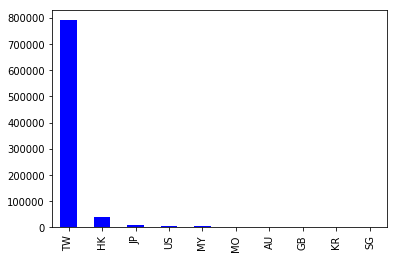

In [12]:
BarR = df_22.plot.bar(color="b")

In [13]:
df['country'].value_counts()

TW    789605
HK     40947
JP      8392
US      5871
MY      5213
MO      3020
AU      2963
GB      1920
KR      1886
SG      1699
TH      1459
CA      1445
FR       471
DE       447
CH       402
VN       333
IT       288
ID       250
NL       238
NZ       199
AP       164
ES       151
PH       134
KH       120
BN       100
CZ        86
AT        72
PY        60
CO        56
CN        53
       ...  
CL         9
SI         9
MM         8
BD         8
MC         7
SA         7
PG         6
FI         6
MV         5
GT         5
HN         5
NI         5
LA         4
KW         4
OM         4
LK         4
AL         3
DO         3
IL         2
VE         2
LU         2
PA         2
PE         2
CR         2
BO         1
AO         1
NP         1
SV         1
NG         1
IS         1
Name: country, Length: 86, dtype: int64

## Category ID

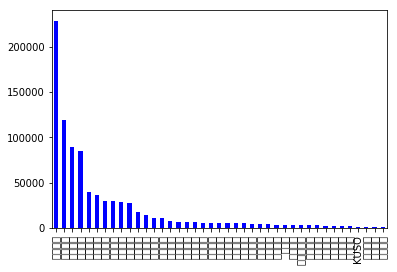

In [14]:
BarR = df['category_id'].value_counts().plot.bar(color="b")

In [15]:
df['category_id'].value_counts()

美味食記     228955
國外旅遊     119184
國內旅遊      89637
不設分類      84732
親子育兒      39401
食譜分享      36647
數位生活      29862
美容彩妝      29228
時尚流行      29058
生活綜合      27205
視聽娛樂      17308
醫療保健      14577
星座算命      11351
電影評論      10779
偶像明星       7450
運動體育       6268
心情日記       6108
財經企管       6082
小說連載       5643
戀愛情事       5559
收藏嗜好       5458
圖文創作       5280
電玩動漫       5171
職場甘苦       5083
結婚紀錄       4674
進修深造       4218
攝影寫真       3756
音樂評析       3413
汽機車        3289
裝潢設計       3193
宗教超自然      3007
寵物日記       2931
藝文評論       2909
心理測驗       2506
活動紀錄       1943
散文筆記       1717
政論人文       1510
KUSO       1168
校園生活       1114
視覺設計        976
漫畫塗鴉        518
Name: category_id, dtype: int64

取前10

In [16]:
aa = df['category_id'].value_counts().head(10)
aa

美味食記    228955
國外旅遊    119184
國內旅遊     89637
不設分類     84732
親子育兒     39401
食譜分享     36647
數位生活     29862
美容彩妝     29228
時尚流行     29058
生活綜合     27205
Name: category_id, dtype: int64

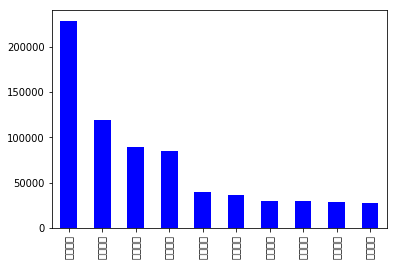

In [17]:
BarAA = aa.plot.bar(color="b")

## Browser

In [18]:
df['browser'].value_counts()

Chrome Mobile                  285614
Chrome                         268633
Mobile Safari                  120974
Android                         78162
Other                           32837
Firefox                         26095
Chrome Mobile iOS               24679
IE                              23896
Safari                           4208
Firefox Mobile                   1557
UC Browser                        489
Maxthon                           419
Opera Mobile                      410
IE Mobile                         218
Opera                             198
Chrome Frame                      147
Yandex Browser                    113
BlackBerry WebKit                  63
Sogou Explorer                     58
Pale Moon (Firefox Variant)        25
Avant                              22
Chromium                           17
QQ Browser                         10
Baidu Browser                       7
Skyfire                             4
Iceweasel                           4
Sleipnir    

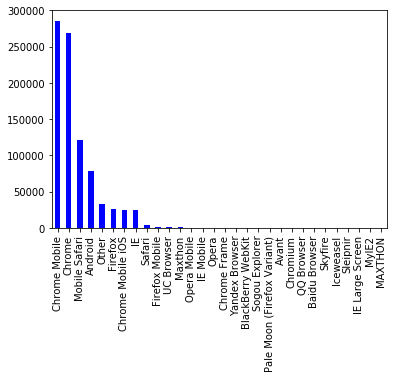

In [19]:
BarR = df['browser'].value_counts().plot.bar(color="b")

## Device brand

In [20]:
df['device_brand'].value_counts()

                 363637
Apple            145639
Samsung          123145
hTC               83841
Sony              58017
Asus              28981
LG                14266
HTC               13321
小米                10294
InFocus            5535
HP                 4271
TWM                2192
HUAWEI             1533
Google             1491
ACER               1474
SonyEricsson       1177
OPPO               1146
ZTE                 831
Nokia               782
G-Plus              557
酷派                  472
美圖                  470
Lenovo              462
Sharp               420
Pantech             367
ChangJiang          334
SK                  331
Fareastone          287
步步高                 281
moii                270
                  ...  
Nvidia                4
Disney Mobile         4
夢想                    4
揚邑                    4
優思                    3
T-Mobile              3
IVG                   3
Vodafone              3
天米                    3
方天多                   2
Novo            

取前10，發現有很多沒有label

In [21]:
df['device_brand'].value_counts()
bb = df['device_brand'].value_counts().head(10)
bb

           363637
Apple      145639
Samsung    123145
hTC         83841
Sony        58017
Asus        28981
LG          14266
HTC         13321
小米          10294
InFocus      5535
Name: device_brand, dtype: int64

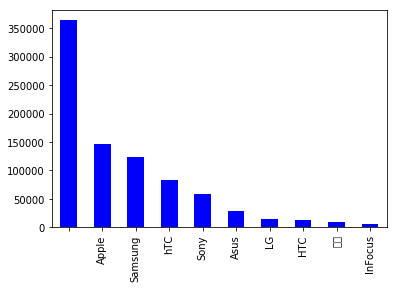

In [22]:
BarBB = bb.plot.bar(color="b")

將沒有值的資料取出來分析他們的OS

In [23]:
df_bb = df[df["device_brand"] == ""]
df_bb['os'].value_counts()

Windows 7        214645
Windows XP        45781
Windows           44019
Mac OS X          19218
Android           17908
Linux             10696
Windows 8          7637
Windows Vista      3265
Ubuntu              175
Windows 2000        131
Chrome OS            60
Windows RT           55
iOS                  33
Windows Phone        12
Windows 98            2
Name: os, dtype: int64

## OS

In [24]:
df['os'].value_counts()

Android          377104
Windows 7        214645
iOS              145672
Windows XP        45781
Windows           44019
Mac OS X          19234
Linux             10701
Windows 8          7637
Windows Vista      3265
Windows Phone       224
Ubuntu              175
Windows RT          155
Windows 2000        131
BlackBerry OS        63
Chrome OS            60
Windows 98            2
Name: os, dtype: int64

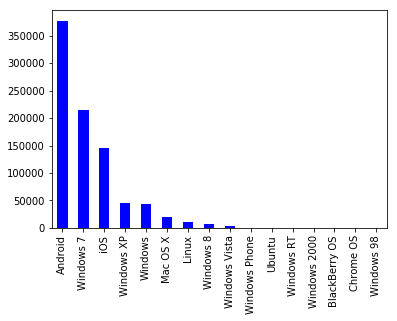

In [25]:
Bar_oo = df['os'].value_counts().plot.bar(color="b")

In [26]:
oo = df['os'].value_counts().head(10)
oo

Android          377104
Windows 7        214645
iOS              145672
Windows XP        45781
Windows           44019
Mac OS X          19234
Linux             10701
Windows 8          7637
Windows Vista      3265
Windows Phone       224
Name: os, dtype: int64

## City

In [27]:
df['city'].value_counts()

Taipei             457779
                   335129
CentralDistrict     29897
Taichung             8412
Kaohsiung            3618
Tokyo                2076
Hsinchu              2058
Singapore            1469
KualaLumpur          1436
Taoyan               1385
Miaoli               1376
Kowloon              1307
KwaiChung            1032
Tainan                983
Macau                 682
KwunTong              601
London                472
Bangkok               465
Ynlin                 453
Seoul                 429
Hatfield              428
Vibhavadi             400
Brisbane              300
QuarryBay             286
Chiai                 285
Hanoi                 274
Keelung               273
Changhua              239
PetalingJaya          212
Perth                 211
                    ...  
Groton                  1
Farmingville            1
Brainerd                1
Onil                    1
Cartago                 1
Blumberg                1
Kirkland                1
Wangaratta  

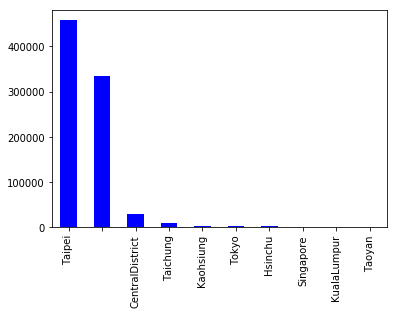

In [28]:
cc = df['city'].value_counts().head(10)
Bar_cc = cc.plot.bar(color="b")

## Author ID

In [29]:
df['author_id'].value_counts()

lohas               23591
leeyihugh            7371
anise                6798
cline1413            5987
uniquevera           5765
wkitty               5708
seba                 5462
nellydyu             5121
mrmad                5075
estherhsiao          4759
choyce               4591
cheng0073            4206
carriewang           4118
hsing16              4105
nigi33kimo           4084
mygod0328            4007
naughtyangel         3790
smilejean            3784
boylondon            3666
dinosaurs            3620
mimg47               3425
bajenny              3319
judyer101010         3245
ksdelicacy           3239
RainDog              3234
zine1215             3196
paine0602            2888
jay7134              2818
murasakikuma         2785
ch3126               2692
                    ...  
cutebodi               41
trinakuo               41
cloudiecandy           41
yibabi                 41
tungbin                40
w0973320589            40
neoneo5466             40
vinegarevery

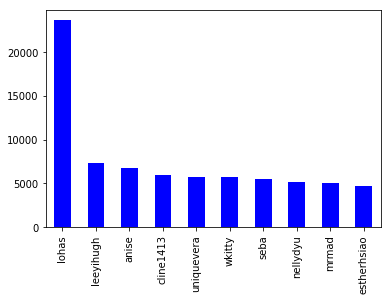

In [30]:
au=df['author_id'].value_counts().head(10)
Bar_au = au.plot.bar(color="b")

## Time analyze
### hour

C:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


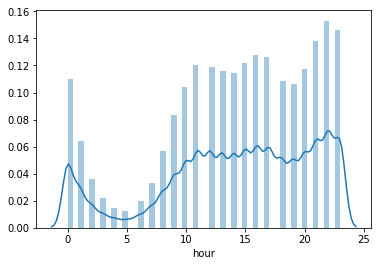

In [31]:
sns.distplot(df['hour'], hist=True)

###  Day

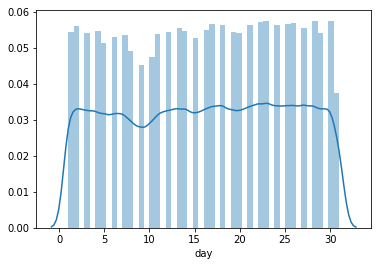

In [32]:
sns.distplot(df['day'], hist=True)

### Weekday

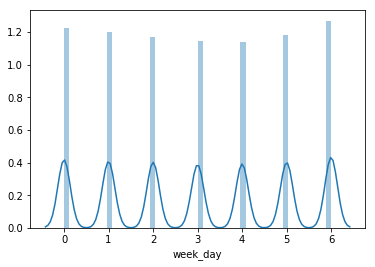

In [33]:
sns.distplot(df['week_day'], hist=True)

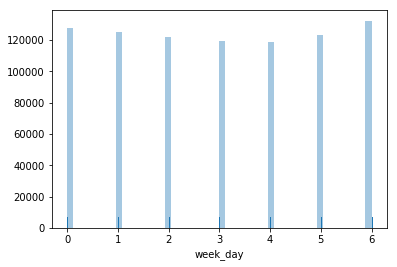

In [34]:
sns.distplot(df['week_day'], kde=False, rug=True)

### Month

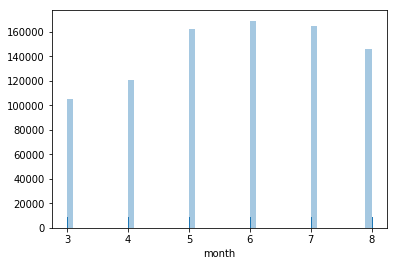

In [35]:
sns.distplot(df['month'], kde=False, rug=True)

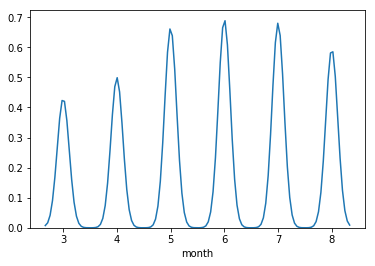

In [36]:
sns.distplot(df['month'], hist=False)

In [37]:
df['month'].value_counts()

6    169223
7    164937
5    162462
8    145778
4    121038
3    105430
Name: month, dtype: int64

### Timestamp

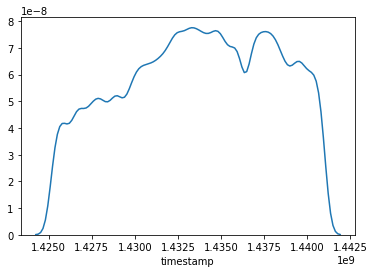

In [38]:
sns.distplot(df['timestamp'], hist=False)